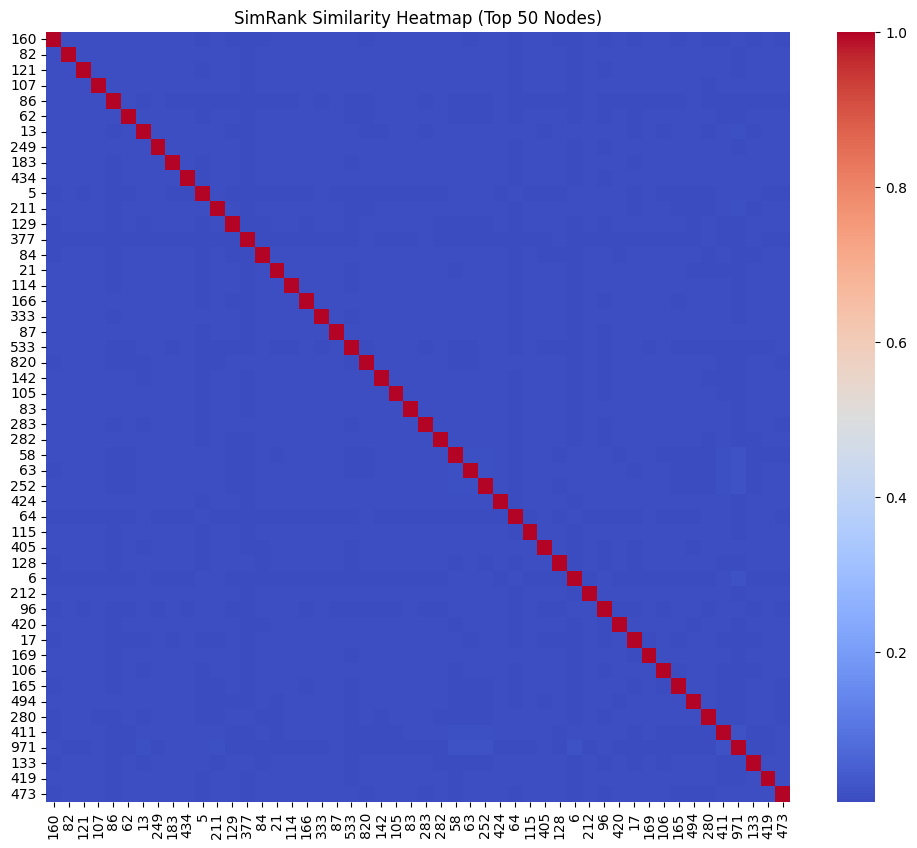

SimRank insights saved in 'simrank_insights.csv'


In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset
edges_file = "email-Eu-core.txt"
labels_file = "email-Eu-core-department-labels.txt"

# Load edges
edges = pd.read_csv(edges_file, sep=' ', header=None, names=['source', 'target'])
G = nx.DiGraph()
G.add_edges_from(edges.values)

# Load department labels
labels = pd.read_csv(labels_file, sep=' ', header=None, names=['node', 'department'])
node_to_department = dict(zip(labels['node'], labels['department']))

# Compute SimRank
def simrank(graph, decay_factor=0.8, max_iter=100, epsilon=1e-4):
    nodes = list(graph.nodes())
    node_count = len(nodes)
    sim = np.eye(node_count)
    prev_sim = np.zeros((node_count, node_count))
    nodes_index = {node: idx for idx, node in enumerate(nodes)}
    
    for _ in range(max_iter):
        for u in nodes:
            for v in nodes:
                if u == v:
                    continue
                u_neighbors = set(graph.predecessors(u))
                v_neighbors = set(graph.predecessors(v))
                if not u_neighbors or not v_neighbors:
                    sim[nodes_index[u], nodes_index[v]] = 0
                else:
                    sim[nodes_index[u], nodes_index[v]] = (
                        decay_factor 
                        * sum(sim[nodes_index[un], nodes_index[vn]] 
                              for un in u_neighbors for vn in v_neighbors)
                        / (len(u_neighbors) * len(v_neighbors))
                    )
        if np.linalg.norm(sim - prev_sim) < epsilon:
            break
        prev_sim = sim.copy()
    return sim, nodes_index

sim_matrix, node_index = simrank(G)

# Save SimRank Scores
sim_df = pd.DataFrame(sim_matrix, index=node_index.keys(), columns=node_index.keys())
sim_df.to_csv("simrank_scores.csv")

# Visualization: Heatmap of top 50 nodes
top_nodes = edges['source'].value_counts().head(50).index
top_indices = [node_index[n] for n in top_nodes if n in node_index]
sim_top = sim_matrix[np.ix_(top_indices, top_indices)]

plt.figure(figsize=(12, 10))
sns.heatmap(sim_top, xticklabels=top_nodes, yticklabels=top_nodes, cmap="coolwarm")
plt.title("SimRank Similarity Heatmap (Top 50 Nodes)")
plt.show()

# Insights
# Analyze inter-department connections
sim_df['department'] = sim_df.index.map(node_to_department)
inter_department_sim = sim_df.groupby(['department']).mean()

print("SimRank insights saved in 'simrank_insights.csv'")
inter_department_sim.to_csv("simrank_insights.csv")


In [6]:
# Calculate the average SimRank score per department
sim_df['department'] = [node_to_department[node] for node in sim_df.index]
department_sim = sim_df.groupby('department').mean()

# Ensure the structure is as expected
department_sim.head()
# Calculate the average SimRank score per department
sim_df['department'] = [node_to_department[node] for node in sim_df.index]
department_sim = sim_df.groupby('department').mean()

# Ensure the structure is as expected
department_sim.head()

,0,1,2,3,4,5,6,7,8,9,...,995,996,997,998,999,1000,1001,1002,1003,1004
department,,,,,,,,,,,,,,,,,,,,,
0,0.010867,0.010738,0.008005,0.008163,0.008381,0.009884,0.009819,0.006959,0.007576,0.006248,...,0.0,0.007924,0.006666,0.012906,0.008674,0.013459,0.008699,0.007293,0.009941,0.007173
1,0.031071,0.028253,0.007771,0.007875,0.007879,0.009008,0.008102,0.006854,0.006988,0.005944,...,0.0,0.006725,0.006886,0.009418,0.008226,0.009486,0.007924,0.042429,0.008117,0.006886
2,0.008238,0.008788,0.007975,0.008161,0.008163,0.009062,0.008739,0.008158,0.008969,0.007212,...,0.0,0.007799,0.006942,0.008209,0.008262,0.007782,0.007985,0.007756,0.007669,0.007425
3,0.010203,0.010738,0.009454,0.009501,0.010163,0.010253,0.008874,0.008099,0.009027,0.006423,...,0.0,0.007884,0.007998,0.013391,0.009782,0.010165,0.008115,0.008085,0.009073,0.007643
4,0.010080,0.010133,0.008212,0.008527,0.008807,0.009254,0.009231,0.007515,0.007860,0.006543,...,0.0,0.007536,0.007706,0.033119,0.008914,0.022556,0.007946,0.007956,0.008867,0.007315


In [8]:
import pandas as pd

# Load the SimRank scores and insights
simrank_scores = pd.read_csv("simrank_scores.csv")
simrank_insights = pd.read_csv("simrank_insights.csv")

# Check the structure of the data
simrank_scores.head(), simrank_insights.head()


(   Unnamed: 0         0         1         2         3         4         5  \
 0           0  1.000000  0.015922  0.009086  0.008818  0.008602  0.009980   
 1           1  0.015922  1.000000  0.007514  0.007728  0.008362  0.010143   
 2           2  0.009086  0.007514  1.000000  0.020970  0.020410  0.011309   
 3           3  0.008818  0.007728  0.020970  1.000000  0.020595  0.011680   
 4           4  0.008602  0.008362  0.020410  0.020595  1.000000  0.011251   
 
           6         7         8  ...  995       996       997       998  \
 0  0.008967  0.008154  0.007747  ...  0.0  0.007448  0.006621  0.033257   
 1  0.009138  0.007361  0.006924  ...  0.0  0.007758  0.006878  0.008587   
 2  0.015186  0.007458  0.008183  ...  0.0  0.006950  0.007065  0.007251   
 3  0.015374  0.007151  0.008465  ...  0.0  0.006963  0.007128  0.007373   
 4  0.014437  0.006807  0.008484  ...  0.0  0.006956  0.007139  0.007533   
 
         999      1000      1001      1002      1003      1004  
 0  0.0

In [10]:
# Check the column names of the simrank_scores DataFrame
print(simrank_scores.columns)


Index(['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '995', '996', '997', '998', '999', '1000', '1001', '1002', '1003',
       '1004'],
      dtype='object', length=1006)


In [11]:
# Display the first few rows to inspect the structure
print(simrank_scores.head())


   Unnamed: 0         0         1         2         3         4         5  \
0           0  1.000000  0.015922  0.009086  0.008818  0.008602  0.009980   
1           1  0.015922  1.000000  0.007514  0.007728  0.008362  0.010143   
2           2  0.009086  0.007514  1.000000  0.020970  0.020410  0.011309   
3           3  0.008818  0.007728  0.020970  1.000000  0.020595  0.011680   
4           4  0.008602  0.008362  0.020410  0.020595  1.000000  0.011251   

          6         7         8  ...  995       996       997       998  \
0  0.008967  0.008154  0.007747  ...  0.0  0.007448  0.006621  0.033257   
1  0.009138  0.007361  0.006924  ...  0.0  0.007758  0.006878  0.008587   
2  0.015186  0.007458  0.008183  ...  0.0  0.006950  0.007065  0.007251   
3  0.015374  0.007151  0.008465  ...  0.0  0.006963  0.007128  0.007373   
4  0.014437  0.006807  0.008484  ...  0.0  0.006956  0.007139  0.007533   

        999      1000      1001      1002      1003      1004  
0  0.008500  0.013369 

/tmp/ipykernel_14119/181057795.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


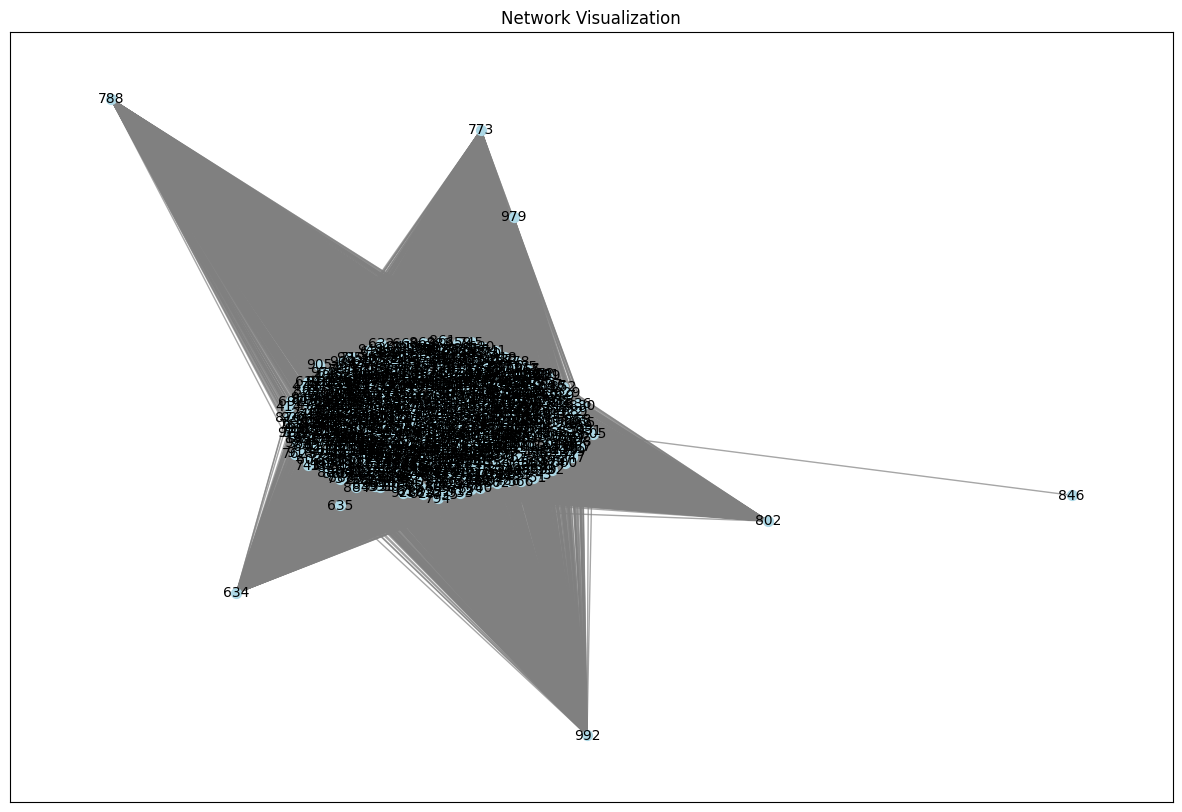

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Read the dataset again
simrank_scores = pd.read_csv('simrank_scores.csv')

# Extract the SimRank score matrix
sim_matrix = simrank_scores.drop(columns='Unnamed: 0').values
nodes = simrank_scores['Unnamed: 0'].values

# Create a list of node pairs and their corresponding SimRank scores
edges = []
for i in range(len(nodes)):
    for j in range(i+1, len(nodes)):  # Only consider upper triangle (exclude diagonal)
        if sim_matrix[i][j] > 0:  # Optional: Filter by threshold if necessary
            edges.append((nodes[i], nodes[j], sim_matrix[i][j]))

# Create a network graph using networkx
G_sim = nx.Graph()
G_sim.add_weighted_edges_from(edges)

# Visualize the network
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_sim, seed=42)
nx.draw_networkx_nodes(G_sim, pos, node_size=50, node_color="lightblue")
nx.draw_networkx_edges(G_sim, pos, alpha=0.7, edge_color="gray")
nx.draw_networkx_labels(G_sim, pos, font_size=10, font_color="black")
plt.title("Network Visualization")
plt.show()


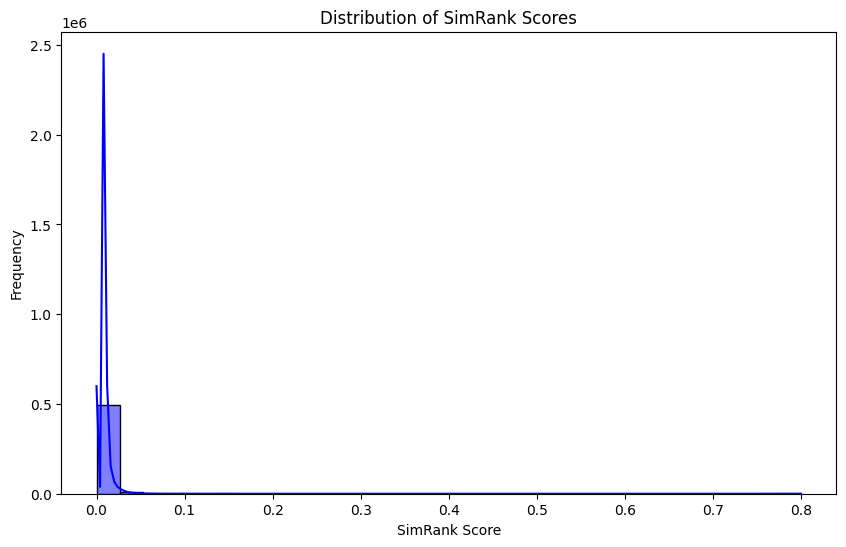

In [14]:
import seaborn as sns
import numpy as np
# Flatten the SimRank matrix (excluding the diagonal)
simrank_values = sim_matrix[np.triu_indices(len(nodes), k=1)]

# Plot histogram of SimRank scores
plt.figure(figsize=(10, 6))
sns.histplot(simrank_values, kde=True, color='blue', bins=30)
plt.title('Distribution of SimRank Scores')
plt.xlabel('SimRank Score')
plt.ylabel('Frequency')
plt.show()


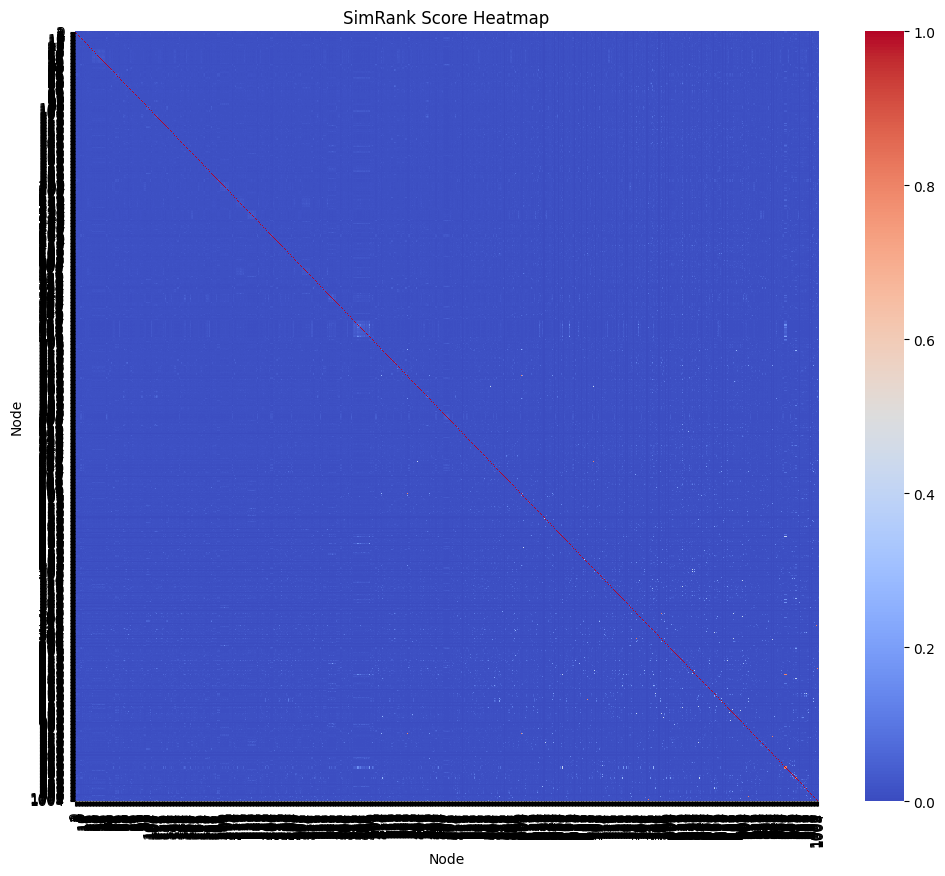

In [15]:
import seaborn as sns

# Create a heatmap of the SimRank matrix (normalized for better visualization)
plt.figure(figsize=(12, 10))
sns.heatmap(sim_matrix, xticklabels=nodes, yticklabels=nodes, cmap='coolwarm', cbar=True)
plt.title('SimRank Score Heatmap')
plt.xlabel('Node')
plt.ylabel('Node')
plt.show()


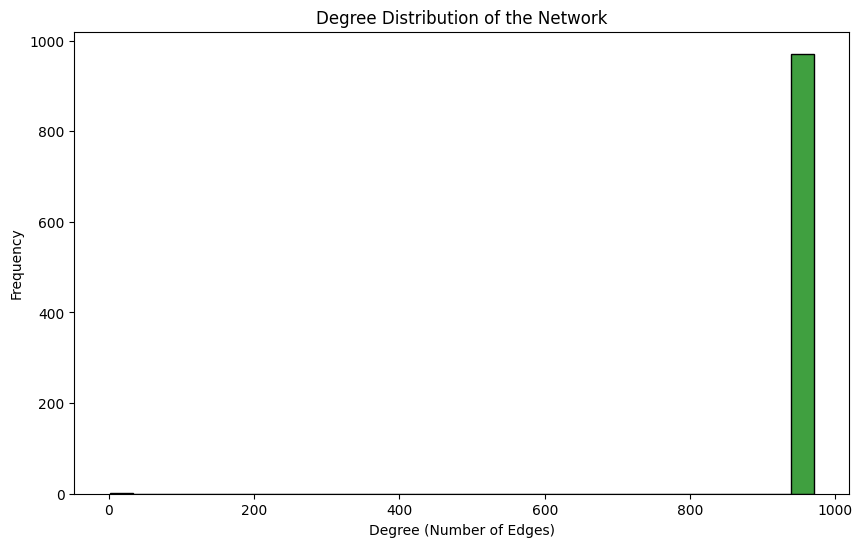

In [16]:
# Calculate the degree of each node
degree_dict = dict(G_sim.degree())
degree_values = list(degree_dict.values())

# Plot degree distribution
plt.figure(figsize=(10, 6))
sns.histplot(degree_values, kde=False, color='green', bins=30)
plt.title('Degree Distribution of the Network')
plt.xlabel('Degree (Number of Edges)')
plt.ylabel('Frequency')
plt.show()


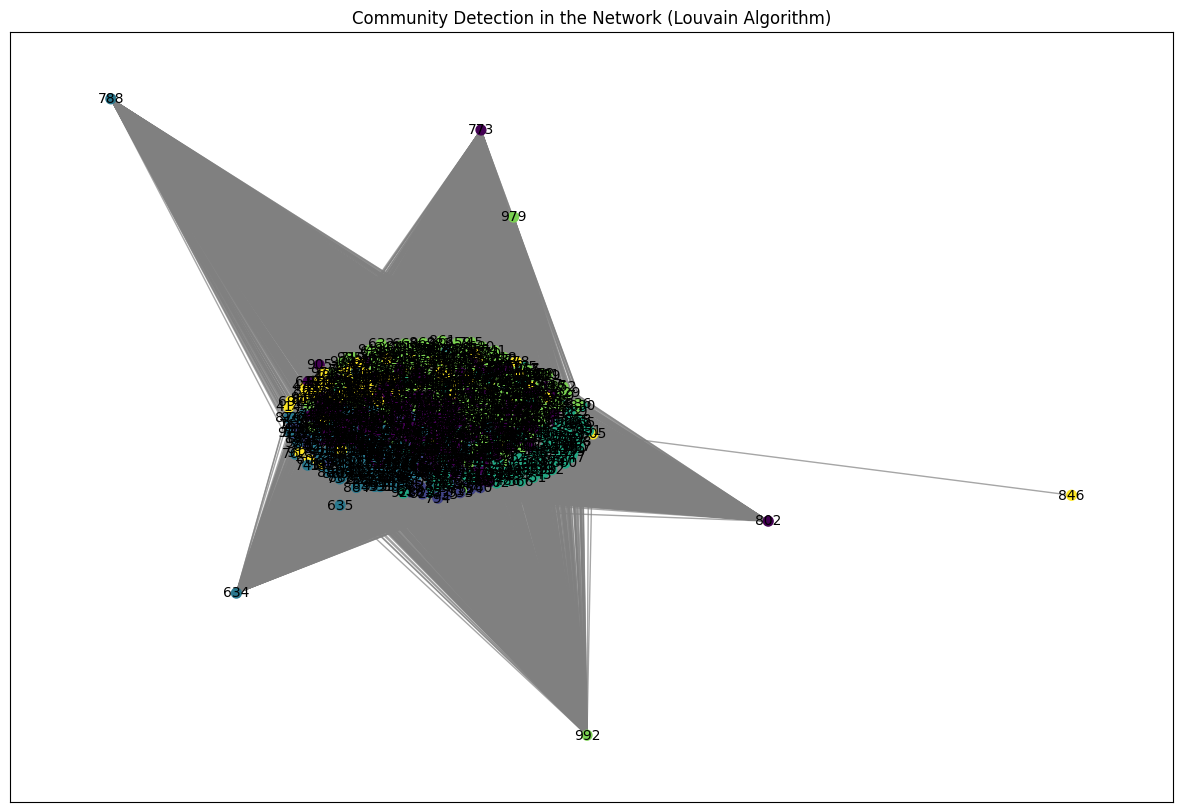

In [18]:
import community as community_louvain

# Apply the Louvain community detection algorithm
partition = community_louvain.best_partition(G_sim)

# Draw the graph with nodes colored by community
plt.figure(figsize=(15, 10))
pos = nx.spring_layout(G_sim, seed=42)
cmap = plt.cm.jet
nx.draw_networkx_nodes(G_sim, pos, node_size=50, node_color=[partition[node] for node in G_sim.nodes()])
nx.draw_networkx_edges(G_sim, pos, alpha=0.7, edge_color="gray")
nx.draw_networkx_labels(G_sim, pos, font_size=10, font_color="black")
plt.title("Community Detection in the Network (Louvain Algorithm)")
plt.show()


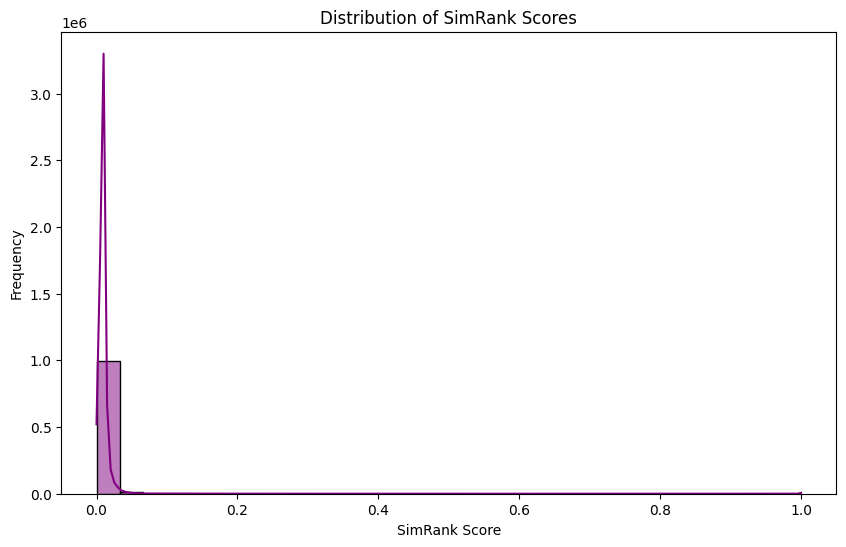

Top N Most Similar Node Pairs:
        node1 node2  simrank_score
0           0     0            1.0
332986    331   331            1.0
346064    344   344            1.0
345058    343   343            1.0
344052    342   342            1.0
343046    341   341            1.0
342040    340   340            1.0
341034    339   339            1.0
340028    338   338            1.0
339022    337   337            1.0


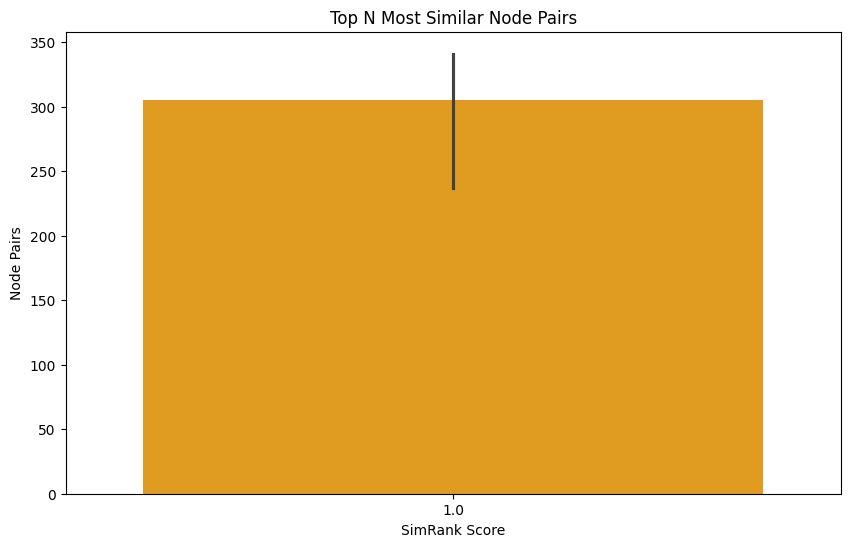

Graph Density: 0.1474
Average Clustering Coefficient: 0.0000


/tmp/ipykernel_73166/837324016.py:69: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(set(partition.values())))


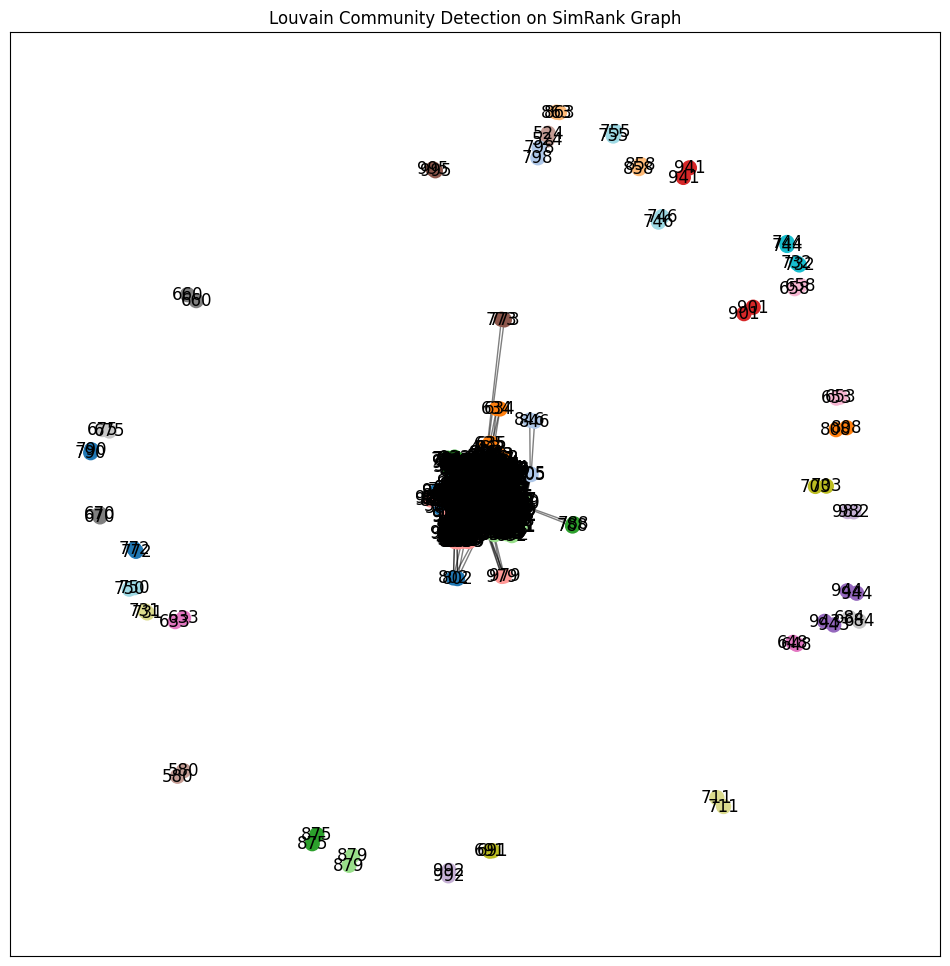

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import community as community_louvain

# Load the SimRank scores CSV
simrank_scores = pd.read_csv('simrank_scores.csv', index_col=0)

# 1. **Distribution of SimRank Scores**
plt.figure(figsize=(10, 6))
sns.histplot(simrank_scores.values.flatten(), bins=30, kde=True, color='purple')
plt.title('Distribution of SimRank Scores')
plt.xlabel('SimRank Score')
plt.ylabel('Frequency')
plt.show()

# 2. **Top N Most Similar Node Pairs**
# Flatten the dataframe and sort by similarity scores
simrank_scores_flat = simrank_scores.stack().reset_index()
simrank_scores_flat.columns = ['node1', 'node2', 'simrank_score']
simrank_scores_flat = simrank_scores_flat.sort_values(by='simrank_score', ascending=False)

# Get top N most similar node pairs
top_n = 10
top_similar_pairs = simrank_scores_flat.head(top_n)

# Display top N pairs
print("Top N Most Similar Node Pairs:")
print(top_similar_pairs)

# Visualize the top N most similar node pairs
plt.figure(figsize=(10, 6))
sns.barplot(x='simrank_score', y='node1', data=top_similar_pairs, color='orange')
plt.title('Top N Most Similar Node Pairs')
plt.xlabel('SimRank Score')
plt.ylabel('Node Pairs')
plt.show()

# 3. **Graph Density**
# Create a graph from the SimRank scores and calculate density
G_sim = nx.Graph()

# Add edges based on SimRank scores
threshold = 0.01  # Set a threshold to include edges
for _, row in simrank_scores.iterrows():
    for col in simrank_scores.columns:
        if row[col] > threshold:
            G_sim.add_edge(row.name, col, weight=row[col])

# Calculate graph density
density = nx.density(G_sim)
print(f"Graph Density: {density:.4f}")

# 4. **Clustering Coefficient**
# Calculate clustering coefficient for the graph
clustering_coeff = nx.clustering(G_sim)
avg_clustering_coeff = sum(clustering_coeff.values()) / len(clustering_coeff)

print(f"Average Clustering Coefficient: {avg_clustering_coeff:.4f}")

# 5. **Community Detection (Louvain)**
# Apply the Louvain community detection algorithm
partition = community_louvain.best_partition(G_sim)

# Visualize the communities
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G_sim)
cmap = plt.cm.get_cmap('tab20', len(set(partition.values())))

# Draw the graph with node colors based on community
nx.draw_networkx_nodes(G_sim, pos, partition.keys(), node_size=100, node_color=list(partition.values()), cmap=cmap)
nx.draw_networkx_edges(G_sim, pos, alpha=0.5)
nx.draw_networkx_labels(G_sim, pos, font_size=12, font_color='black')
plt.title('Louvain Community Detection on SimRank Graph')
plt.show()
